In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the data set
data = pd.read_csv("C:\\ASSIGNMENTS\\Decision Tree and Random Forest\\iris.csv")

In [3]:
data.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [7]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
data.Species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

In [9]:
colnames = list(data.columns)

In [10]:
predictors = colnames[:4]
target = colnames[4]


In [11]:
# Splitting data into training and testing data set
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
train,test = train_test_split(data,test_size = 0.2)


In [13]:
from sklearn.tree import  DecisionTreeClassifier
help(DecisionTreeClassifier)


Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 

# Model

In [14]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(train[predictors],train[target])


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
preds = model.predict(test[predictors])
type(preds)

numpy.ndarray

In [16]:
pd.Series(preds).value_counts()

setosa        12
versicolor    10
virginica      8
dtype: int64

In [17]:
pd.crosstab(test[target],preds)

col_0,setosa,versicolor,virginica
Species,,,
setosa,12,0,0
versicolor,0,10,1
virginica,0,0,7


In [18]:
temp = pd.Series(model.predict(train[predictors])).reset_index(drop=True)
temp

0      versicolor
1      versicolor
2       virginica
3          setosa
4       virginica
          ...    
115        setosa
116        setosa
117        setosa
118     virginica
119     virginica
Length: 120, dtype: object

In [19]:
# Accuracy = train
np.mean(pd.Series(train.Species).reset_index(drop=True) == pd.Series(model.predict(train[predictors])))

1.0

In [20]:
# Accuracy = Test
np.mean(preds==test.Species) # 0.933


0.9666666666666667

In [21]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


C:\Users\Sagar S S\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [23]:
from sklearn import tree

[Text(125.55000000000001, 201.90857142857143, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 120\nvalue = [38, 39, 43]'),
 Text(83.7, 170.84571428571428, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(167.4, 170.84571428571428, 'X[2] <= 4.75\nentropy = 0.998\nsamples = 82\nvalue = [0, 39, 43]'),
 Text(83.7, 139.78285714285715, 'X[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(41.85, 108.72, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(125.55000000000001, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 139.78285714285715, 'X[2] <= 5.05\nentropy = 0.353\nsamples = 45\nvalue = [0, 3, 42]'),
 Text(209.25, 108.72, 'X[1] <= 3.1\nentropy = 0.918\nsamples = 9\nvalue = [0, 3, 6]'),
 Text(167.4, 77.65714285714284, 'X[0] <= 6.25\nentropy = 0.811\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(125.55000000000001, 46.59428571428572, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(209.25, 46.59428571428572, 'X[3] <= 1.75

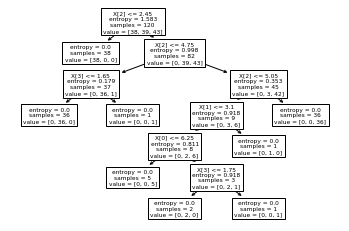

In [24]:
tree.plot_tree(model.fit(train[predictors],train[target])) 
